In [432]:
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [433]:
train = pd.read_csv('/Users/beiyulin/Desktop/Titanic.train.csv')
test  =pd.read_csv('/Users/beiyulin/Desktop/Titanic.test.csv')
submit=pd.read_csv('/Users/beiyulin/Desktop/Titanic.gender_submission.csv')

In [434]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [435]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [436]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [437]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [438]:
data =train.append(test)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [439]:
data.reset_index(inplace=True,drop =True)

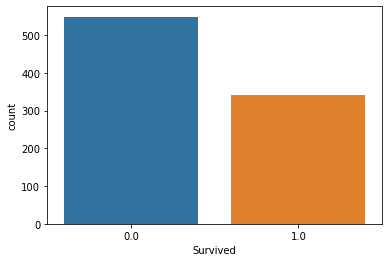

In [440]:
sns.countplot(data['Survived'])

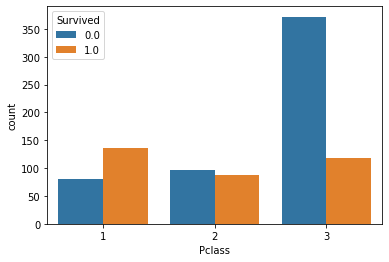

In [441]:
sns.countplot(data['Pclass'], hue=data['Survived'])

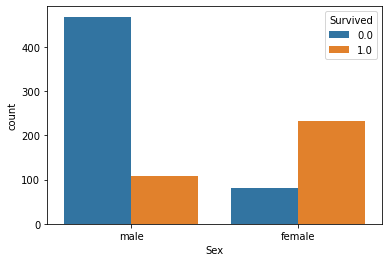

In [442]:
sns.countplot(data['Sex'],hue =data['Survived'])

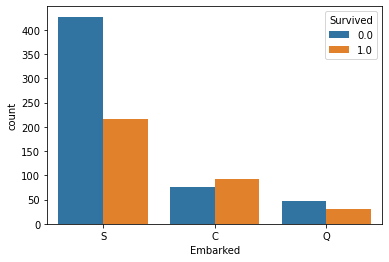

In [443]:
sns.countplot(data['Embarked'],hue =data['Survived'])

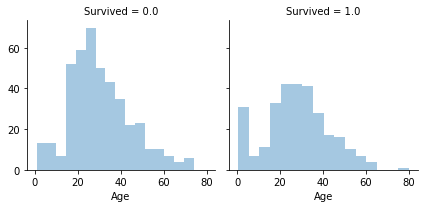

In [444]:
g=sns.FacetGrid(data, col='Survived') 
g.map(sns.distplot,'Age',kde=False)

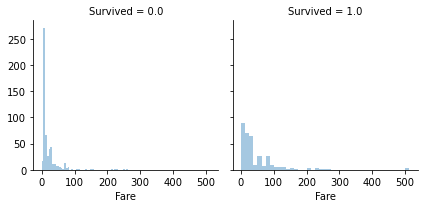

In [445]:
g=sns.FacetGrid(data, col='Survived') 
g.map(sns.distplot,'Fare',kde=False)

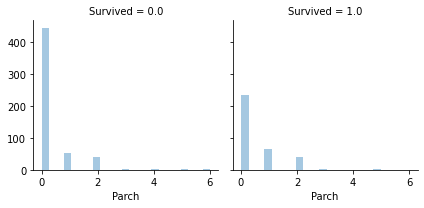

In [446]:
g=sns.FacetGrid(data, col='Survived') 
g.map(sns.distplot,'Parch',kde=False)

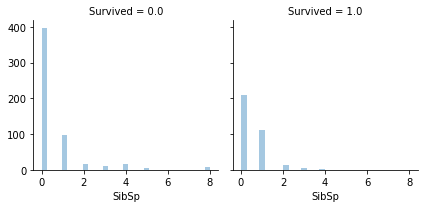

In [447]:
g=sns.FacetGrid(data, col='Survived') 
g.map(sns.distplot,'SibSp',kde=False)

In [448]:
data['Family_Size']=data['Parch']+data['SibSp']

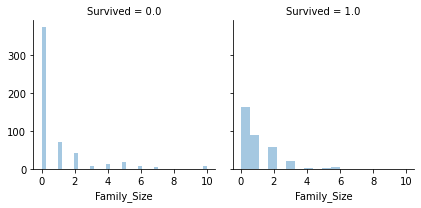

In [449]:
g=sns.FacetGrid(data, col='Survived') 
g.map(sns.distplot,'Family_Size',kde=False)

In [450]:
data['Title1']=data['Name'].str.split("," ,expand =True)[1]  #expand是將其資料分割好

In [451]:
data['Name'].str.split("," ,expand =True).head(3)

,0,1
0,Braund,Mr. Owen Harris
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss. Laina


In [452]:
data['Title1'].head(3)

0                                Mr. Owen Harris
1     Mrs. John Bradley (Florence Briggs Thayer)
2                                    Miss. Laina
Name: Title1, dtype: object

In [453]:
data['Title1']=data['Title1'].str.split("." ,expand =True)[0]

In [454]:
data['Title1'].head(3)

0       Mr
1      Mrs
2     Miss
Name: Title1, dtype: object

In [455]:
data['Title1'].str.strip().unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [456]:
pd.crosstab(data['Title1'],data['Sex']).T.style.background_gradient(cmap='summer_r')

Title1,Capt,Col,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Sex,,,,,,,,,,,,,,,,,,
female,0,0,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0,1
male,1,4,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1,0


In [457]:
pd.crosstab(data['Title1'],data['Survived']).T.style.background_gradient(cmap='summer_r')

Title1,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0.0,1,1,1,4,1,0,1,17,55,0,0,436,26,0,6,0,0
1.0,0,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,1


In [458]:
data.groupby(['Title1'])['Age'].mean()

Title1
 Capt            70.000000
 Col             54.000000
 Don             40.000000
 Dona            39.000000
 Dr              43.571429
 Jonkheer        38.000000
 Lady            48.000000
 Major           48.500000
 Master           5.482642
 Miss            21.774238
 Mlle            24.000000
 Mme             24.000000
 Mr              32.252151
 Mrs             36.994118
 Ms              28.000000
 Rev             41.250000
 Sir             49.000000
 the Countess    33.000000
Name: Age, dtype: float64

In [459]:
data.groupby(['Title1','Pclass'])['Age'].mean()

Title1         Pclass
 Capt          1         70.000000
 Col           1         54.000000
 Don           1         40.000000
 Dona          1         39.000000
 Dr            1         45.600000
               2         38.500000
 Jonkheer      1         38.000000
 Lady          1         48.000000
 Major         1         48.500000
 Master        1          6.984000
               2          2.757273
               3          6.090000
 Miss          1         30.338983
               2         20.717083
               3         17.360874
 Mlle          1         24.000000
 Mme           1         24.000000
 Mr            1         41.450758
               2         32.346715
               3         28.318910
 Mrs           1         43.208955
               2         33.518519
               3         32.326531
 Ms            2         28.000000
               3               NaN
 Rev           2         41.250000
 Sir           1         49.000000
 the Countess  1         33.00000

In [460]:
#data['Title2'] = data['Title1'].replace('Mlle','Miss')
#data['Title2'] = data['Title1'].replace('Mme','Mrs')
#data['Title2'] = data['Title1'].replace('Ms','Miss')
#data['Title2'] = data['Title1'].replace('Dr','Mr')
#data['Title2'] = data['Title1'].replace('Major','Mr')
#data['Title2'] = data['Title1'].replace('Lady','Mrs')
#data['Title2'] = data['Title1'].replace('the Countess','Mrs')
#data['Title2'] = data['Title1'].replace('Jonkheer','Mr')
#data['Title2'] = data['Title1'].replace('Col','Mr')
#data['Title2'] = data['Title1'].replace('Rev','Mr')
#data['Title2'] = data['Title1'].replace('Capt','Mr')
#data['Title2'] = data['Title1'].replace('Sir','Mr')
#data['Title2'] = data['Title1'].replace('Don','Mr')
#data['Title2'] = data['Title1'].replace('Dona','Mrs')


In [461]:
#data['Title2'] = data['Title1'].replace(["Mlle","Mme","Ms","Dr","Major","Lady","the Countess","Jonkheer","Col","Rev","Capt","Sir","Don","Dona"],
#["Miss","Mrs","Miss","Mr","Mr","Mrs","Mrs","Mr","Mr","Mr","Mr","Mr","Mr","Mrs"])

In [468]:
data['Title2'] = data['Title1'].str.strip().replace(['Mlle','Mme','Ms','Dr','Major','Lady','the Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
         ['Miss','Mrs','Miss','Mr','Mr','Mrs','Mrs','Mr','Mr','Mr','Mr','Mr','Mr','Mrs'])

In [472]:
data['Title2'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master'], dtype=object)

In [473]:
pd.crosstab(data['Title2'],data['Sex']).T.style.background_gradient(cmap='summer_r')

Title2,Master,Miss,Mr,Mrs
Sex,,,,
female,0,264,1,201
male,61,0,782,0


In [474]:
pd.crosstab(data['Title2'],data['Survived']).T.style.background_gradient(cmap='summer_r')

Title2,Master,Miss,Mr,Mrs
Survived,,,,
0.0,17,55,451,26
1.0,23,130,87,102


In [475]:
data['Ticket_info'] = data['Ticket'].apply(lambda x : x.replace(".","").replace("/","").strip().split(' ')[0] if not x.isdigit() else 'X')

In [476]:
data['Ticket_info'].unique()

array(['A5', 'PC', 'STONO2', 'X', 'PP', 'CA', 'SCParis', 'SCA4', 'A4',
       'SP', 'SOC', 'WC', 'SOTONOQ', 'WEP', 'STONO', 'C', 'SCPARIS',
       'SOP', 'Fa', 'LINE', 'FCC', 'SWPP', 'SCOW', 'PPP', 'SC', 'SCAH',
       'AS', 'SOPP', 'FC', 'SOTONO2', 'CASOTON', 'SCA3', 'STONOQ', 'AQ4',
       'A', 'LP', 'AQ3'], dtype=object)

In [477]:
data['Embarked']= data['Embarked'].fillna('s')

In [478]:
data['Fare']=data['Fare'].fillna(data['Fare'].mean())

In [481]:
data['Cabin'].head(10)

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
7     NaN
8     NaN
9     NaN
Name: Cabin, dtype: object

In [487]:
data['Cabin'] = data['Cabin'].apply(lambda x : str(x)[0] if not pd.isnull(x) else 'NoCabin')

In [488]:
data['Cabin'].unique()

array(['N', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

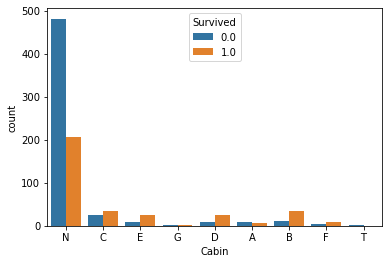

In [489]:
sns.countplot(data['Cabin'],hue =data['Survived'])

In [490]:
data['Sex']= data['Sex'].astype('category').cat.codes
data['Embarked']=data['Embarked'].astype('category').cat.codes
data['Pclass']=data['Pclass'].astype('category').cat.codes
data['Title1']=data['Title1'].astype('category').cat.codes
data['Title2']=data['Title2'].astype('category').cat.codes
data['Cabin']=data['Cabin'].astype('category').cat.codes
data['Ticket_info']=data['Ticket_info'].astype('category').cat.codes

In [491]:
dataAgeNull=data[data['Age'].isnull()] #當年齡沒資料則回傳true
dataAgeNotNull=data[data['Age'].notnull()]#當年齡有資料則回傳true
remove_outlier = dataAgeNotNull[(np.abs(dataAgeNotNull["Fare"]-dataAgeNotNull["Fare"].mean())>(4*dataAgeNotNull["Fare"].std()))|
                      (np.abs(dataAgeNotNull["Family_Size"]-dataAgeNotNull["Family_Size"].mean())>(4*dataAgeNotNull["Family_Size"].std()))                     
                     ]
rfModel_age = RandomForestRegressor(n_estimators=2000,random_state=42)
ageColumns = ['Embarked', 'Fare', 'Pclass', 'Sex', 'Family_Size', 'Title1', 'Title2','Cabin','Ticket_info']
rfModel_age.fit(remove_outlier[ageColumns], remove_outlier["Age"])

ageNullValues = rfModel_age.predict(X= dataAgeNull[ageColumns])
dataAgeNull.loc[:,"Age"] = ageNullValues
data = dataAgeNull.append(dataAgeNotNull)
data.reset_index(inplace=True, drop=True) #整句是要增加一個新的index/ inplace:不創新的東西，直接修改 /drop：刪除資料

/Users/beiyulin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [496]:
dataTrain = data[pd.notnull(data['Survived'])].sort_values(by=["PassengerId"])
dataTest = data[pd.notnull(data['Survived'])].sort_values(by=["PassengerId"])


In [497]:
dataTrain.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_Size', 'Title1',
       'Title2', 'Ticket_info'],
      dtype='object')

In [498]:
dataTrain = dataTrain[['Survived', 'Age', 'Embarked', 'Fare',  'Pclass', 'Sex', 'Family_Size', 'Title2','Ticket_info','Cabin']]
dataTest = dataTest[['Age', 'Embarked', 'Fare', 'Pclass', 'Sex', 'Family_Size', 'Title2','Ticket_info','Cabin']]

In [499]:
dataTrain

,Survived,Age,Embarked,Fare,Pclass,Sex,Family_Size,Title2,Ticket_info,Cabin
263,0.0,22.000000,2,7.2500,2,1,1,2,2,7
264,1.0,38.000000,0,71.2833,0,0,1,3,14,2
265,1.0,26.000000,2,7.9250,2,0,0,1,31,7
266,1.0,35.000000,2,53.1000,0,0,1,3,36,2
267,0.0,35.000000,2,8.0500,2,1,0,2,36,7
...,...,...,...,...,...,...,...,...,...,...
973,0.0,27.000000,2,13.0000,1,1,0,2,36,7
974,1.0,19.000000,2,30.0000,0,0,0,1,36,1
176,0.0,19.099409,2,23.4500,2,0,3,1,34,7
975,1.0,26.000000,0,30.0000,0,1,0,2,36,2


In [500]:
from sklearn.ensemble import RandomForestClassifier
 
rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=1000, #用幾棵樹去計算
                             min_samples_split=12,  #節點再劃分時所需的最小樣本數(default=2)；當樣本不大時，可不設定使用預設，若樣本數量非常大時，則推薦增加此參數值。
                             min_samples_leaf=1,#每棵樹有幾片葉子
                             oob_score=True,#是否採用袋外樣本(out-of-bag samples)來評估模型的準確度(default=False)。
                             random_state=1, #固定種子
                             n_jobs=-1) #同時透過幾個多核心電腦運作

rf.fit(dataTrain.iloc[:, 1:], dataTrain.iloc[:, 0])
print("%.4f" % rf.oob_score_)

0.8294


In [516]:
pd.concat((pd.DataFrame(dataTrain.iloc[:, 1:].columns, columns = ['variable']), 
           pd.DataFrame(rf.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

,variable,importance
4,Sex,0.265510
2,Fare,0.164262
6,Title2,0.152459
0,Age,0.131401
3,Pclass,0.090884
5,Family_Size,0.070836
8,Cabin,0.067027
7,Ticket_info,0.031805
1,Embarked,0.025815


In [532]:
rf_res =  rf.predict(dataTest)
#submit['Survived'] = rf_res
submit['Survived'] = submit['Survived'].astype(int)
submit.to_csv('submit.csv', index= False)

In [533]:
rf_res.shape

(891,)

In [534]:
submit['Survived'] .shape

(418,)

In [535]:
dataTrain.shape

(891, 10)

In [536]:
dataTest.shape

(891, 9)

In [520]:
submit

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
